#### Spam Detection

In [1]:
import pandas as pd
import nltk
import gensim
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("E:/Data Science/Datatrained.com/web scrapping/spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df=df.iloc[:,:2]


In [4]:
df=df.rename(columns={'v1':'label','v2':'message'})

In [5]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
print("The shape of dataframe is ", df.shape)

The shape of dataframe is  (5572, 2)


In [7]:
print("Value Counts of ham and spam ==>",'\n',df['label'].value_counts())

Value Counts of ham and spam ==> 
 ham     4825
spam     747
Name: label, dtype: int64


In [8]:
# Ratio
print('spam ratio =', round(len(df[df['label']=='spam'])/len(df.label),2)*100,'%')
print('ham ratio =', round(len(df[df['label']=='spam'])/len(df.label),2)*100,'%')

spam ratio = 13.0 %
ham ratio = 13.0 %


In [9]:
# New column for length of message
df['length']=df.message.str.len()

In [10]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
# Label encoding 0 and 1
df['label'].replace({'ham':0,'spam':1},inplace=True)

In [12]:
# Convert all messages to lower case
df['message']=df['message'].str.lower()

In [13]:
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [14]:
# Remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

In [15]:
df.head()

,label,message,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in numbr a wkly comp to win fa cup ...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


In [16]:
# Remove stopwords
import string
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english')+['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['message']=df['message'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [17]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length']=df.message.str.len()
df.head()

,label,message,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry numbr wkly comp win fa cup final tk...,155,139
3,0,dun say early hor c already say,49,31
4,0,nah think goes usf lives around though,61,38


In [18]:
# Total length removal
print("Original length", df.length.sum())
print("Clean length", df.clean_length.sum())

Original length 446422
Clean length 300564


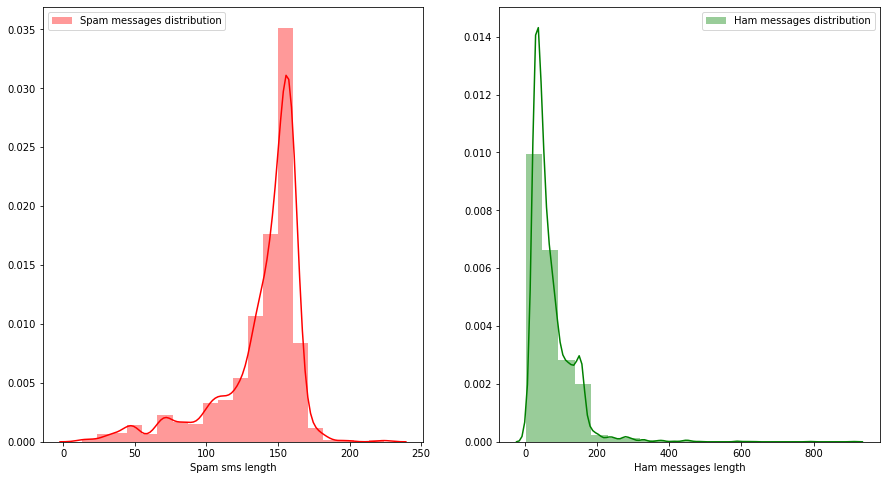

In [27]:
import seaborn as sns
# Message distribution Before cleaning
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20,ax=ax[1],label='Ham messages distribution',color='g')

ax[1].set_xlabel('Ham messages length')
ax[1].legend()

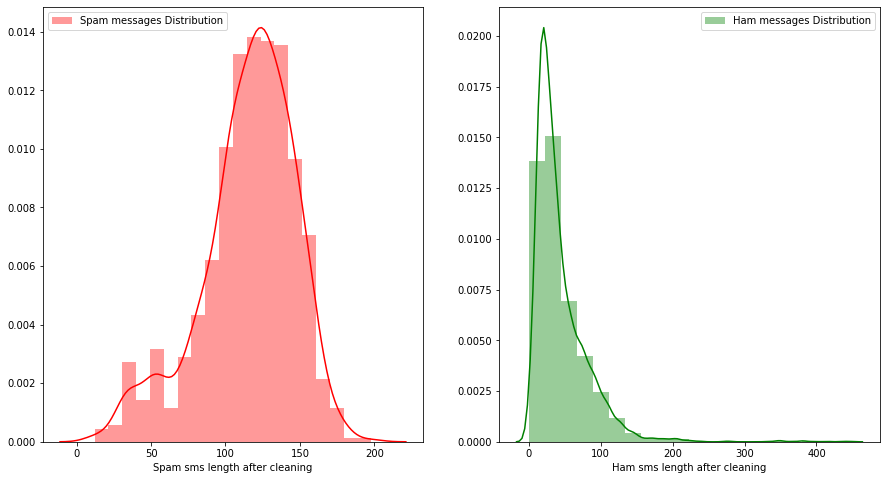

In [30]:
# Message distribution after cleaning
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages Distribution', color='r')
ax[0].set_xlabel('Spam sms length after cleaning')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='Ham messages Distribution',color='g')
ax[1].set_xlabel('Ham sms length after cleaning')
ax[1].legend()

Observations:
1. We can observe that after cleaning there are a lot of changes in the spam messages

In [36]:
!pip install wordcloud

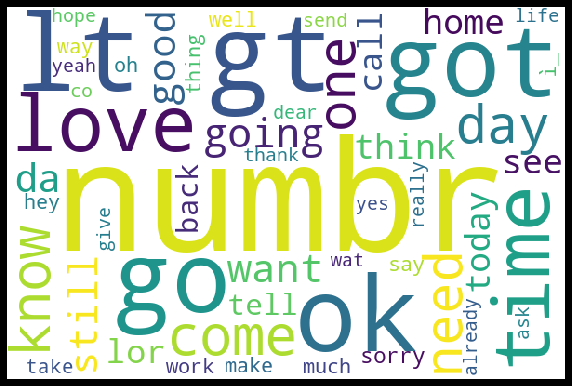

In [38]:
# Getting sense out of loud words in ham
from wordcloud import WordCloud
hams=df['message'][df['label']==0]
ham_cloud=WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
#plt.tight_layout(pad=0)
plt.show()

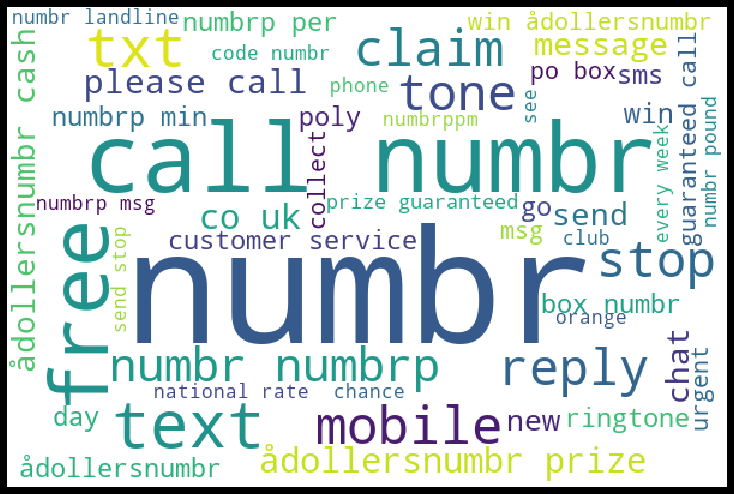

In [39]:
# loud words in spam
spams=df['message'][df['label']==1]
spam_cloud=WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see clearly that some words like "free, claim, cash" etc are indication of spams.

In [40]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec=TfidfVectorizer()
naive=MultinomialNB()
features=tf_vec.fit_transform(df['message'])
X=features
y=df['label']

In [42]:
# train and predict
train_x,test_x,train_y,test_y=train_test_split(X,y,random_state=42,test_size=0.25)
naive.fit(train_x,train_y)
pred=naive.predict(test_x)
acc_score=accuracy_score(test_y,pred)
print("Accuracy Score is", acc_score)

Accuracy Score is 0.9705671213208902


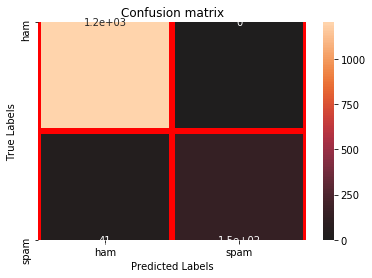

In [44]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(test_y,pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [45]:
conf_mat

array([[1202,    0],
       [  41,  150]], dtype=int64)